##**Rose Diseases Image Classification Project**


> Plant diseases are important to study because not only can they affect the way the plant looks, but they can have a direct impact on the deteriorate and loss of the plant. By using image classification to detect different types of diseases, we can help save time and money for planters and prevent future plants from physical damage.

> In this particular study, we analyze 2 types of rose diseases by creating neural network models that can accurately predict if a rose has a disease and, if so then which kind. The diseases we examine are two of the most common rose diseases - black spots (Diplocarpon rosae) and mildew (Peronospora sparsa). We also include images of healthy roses. Thus, there are 3 possible classifications for roses: Fresh leaf, black spots, and downy mildew.

> To provide some more context, roses with black spot illnesses have brown/black spots developing on their green leaf petals that is caused by fungus that is most susceptible to growing during the cold, moist weather. The black spot disease is considered one of the more serious diseases and can make the plant weak. If they are unattended, then the leaves will start to defoliate. Downy mildew, on the other hand, has become a growing concern and has been very widespread in the past 70 years. The symptoms of downy mildew includes spots of yellow, brown, purple, etc., on the leaves. This disease can also prevent healthy growth and contribute to leaf loss. Furthermore, it can spread to other roses or plants.

**Data Description**


> I analyze rose diseases by turning it into an image classification problem. My set of target classes contains three variables: Fresh leaf (healthy disease-free rose), black-spot, and downy mildew. The data that I work with contains a total of 4,342 images. 1,434 black spotted rose images, 1,478 downy mildew images, and 1,430 fresh leaf images in the dataset. Each image has a dimension of 512x512 (which I then convert into 192x192 pixels). Thus, the input layer of our data shows 3684 neurons. These data points/neurons represent the "features" of our dataset when flattened.


> This dataset is an augmented dataset that comes from a study by Rajbongshi et al. (2022), that also uses this dataset for disease recognition. According to their paper, all images are originally photographed at the Village of Roses in Bangladesh. There are  .



**Why Deep Learning for Plant Disease Detection**



> Deep learning is the best choice for this study because it was built for the purpose of solving computer vision problems such as image classification. During the process, the deep layer neural networks can can classify the image based on vertical or horizontal lines in the image using matrices. Architects can also tune the number of filter sizes, number of filters, strides, padding, pooling type, etc. to reduce overfitting and decrease the error.

> Deep networks have more layers, thus they have greater predictive accuracy, than other models such as multilayer perceptrons. Aside from image classification, they can also handle even more complex computer vision problems, such as object detection, and neural style transferring. It is important to be able to choose this type of model particularly for this problem because accurately distinguishing fresh roses from roses with diseases and the type of disease. This can help create a more fast method for planters and inexperienced planters to find out which roses are unhealthy and how to treat their disease if needed.

**Which models were used:**

*1. Multi-layer Perceptron Network*

*   I chose this model as the first one in order to use this model as a baseline for compare the deeper models that we will be running later on. I expect this model to perform worse compared to the others, considering this network only has a single hidden layer and ANNs tends to be less accurate when solving classification problems compared to deeper networks. Within the input layer and hidden layer, I inserted 100 hidden units for each. My reason for these choices is that I was playing with different number of hidden units for the layers (64, 100, 128, 256, etc) and found 100 to be the optimal number. In addition, I decided to go with the most popular activation function, the relu activation. I also chose Adam as my optimizer because it is known to be one of the best optimizers, as it is the most efficient and can train my network in less time.


*2. Deep Layer Neural Network (CNN) with optimal epochs*

*   For the second model, I chose to increase the depth of the original network by adding an extra hidden layer with 100 filters in each layer. I then experiment with the epoch sizes by first selecting 25 to be the number of epochs in model 2.1, then using the optimal number based on the accuracy score for the final CNN model. For the final CNN model, I discovered that the ideal number of epochs was around 17. I once again use relu activation and Adam as my optimizer. I also added pooling layers after each convolutional layer (max pooling to get the maximum value in each matrix) to reduce dimensionality and prevent overfitting on the training data. I add half-padding in order to keep some of the information around the borders. Finally, I flatten my data from image data into a 1-D data before the dense output layer.

*   I chose this architecture to compare this network with the ANN and see how well it performs compared to the three transfer-learning models that I run after this.

*3. CNN with optimal filters and filter sizes*

*   For the second CNN, I chose to use the kerastuner optimization framework to find the optimal number of filters and filter sizes. The architecture of the model itself is: three convolutional layers with half-padding and relu activation. I allowed the kerastuner to select the optimal number of filters between 32 and 128 for the first layer, and between 63 and 128 for the second. As for the filter sizes, I allowed the tuner to choose a size between 3 and 6.  I kept the optimizer function the same as the previous models.


*4. VGG-16*

*   I then create three more transfer-learning models. chose to use VGG16 because is known to be one of the most popular pre-trained models for image classification, and is one of the best models for image classification in terms of accuracy. It is a good model that has been trained over a million images from ImageNet, and has even gotten second place in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014. This model consists of 16 deep layers.

*   The architecture for the VGG-16 is as follows: There are 13 convolutional layers, 5 max pooling layers, and 3 dense layers in total. The image is passed into 6 “stacks”. The first stack is 2 convolutional layers with 64 filters and one pooling layer. The second stack is 2 convolutional layers with 128 filters and a pooling layer. The third stack contains three convolutional layers with 256 filters and a pooling layer. The image then passed through the 4th stack of three convolutional layers with 512 units and a max pooling layer. The 5th stack is a repeat of the fourth. The image passes through 3 FC layers. Finally, I set the epochs equal to 8, since it would be important for the model to be run through more than once in order to decrease error.


*5. VGG-19*

*   The VGG19 has a very similar structure to the VGG 16, with the biggest difference being that the VGG19 has 19 deep layers. The number of epochs set is once again 8.


*6. Xception*

*  Xception (AKA extreme inception) is another popular model for image classification, that is an extension of the Inception v3. While inception v3 tends to perform better than VGG16, I chose to run the pre-trained model Xception (AKA extreme inception), which is shown to be an extension of the Inception v3 model but provides better results than inception models. It has shown to have perform significantly better on image classification data containing a large number of classes. 

*  The overall architecture for the Exception is as follows: There are three different flows: the entry, middle, and exit flow, with every convolutional layre. The middle flow is repeated eight times. This architecture contains 2 convolutional layers,  13 modified depth wise separable convolutional layers, and 5 pooling layers, with a batch normalization layer following each convolutional layer. The modified depth wise separable in Xception is different from the 2D convolutional layers used in the previous models because a single convolutional filter is applied to each input channel. Finally, I set epochs equal to 8.




*Load Libraries*

In [ ]:
import sys,os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import IPython.display
import pickle
import json
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive")

# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, ReLU
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3
from tensorflow.nn import leaky_relu


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Load Image Data*

In [ ]:
# Extracting all filenames iteratively
base_path = '/content/gdrive/MyDrive/Augmented dataset'
categories = ['Black Spot', 'Downy mildew', 'Fresh Leaf']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [1434, 1478, 1430]
[['/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (1056).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (482).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (968).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (900).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (471).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (218).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (347).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (1196).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (9).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (905).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (251).png', '/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (428).png', '/content/gdrive/My

*Instantiate Preprocessor Function*

In [ ]:
def preprocessor(data, shape=(192, 192)):
        """
        This function reads in images, resizes them to a fixed shape, and
        min/max transforms them, before converting feature values to float32
        for ONNX.
        
        params:
            data
                list of unprocessed images
                      
        returns:
            X
                numpy array of preprocessed image data
                  
        """
           
        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data) # Read in image from filepath.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        #grayscale image?  Use im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, shape) # Change height and width of image.
        img = img / 255.0 # Min-max transform.  

        # Resize the images.
        X = np.array(img)
        #X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels] if needed.
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X


In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
len(image_filepaths)

4342

In [ ]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min() ) #min value of every image is zero
print(X.max() ) #max value of every image is one

4342
(4342, 192, 192, 3)
0.0
1.0


*Create Dummy Variable Data for Y Labels*

In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder 
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
black_spot=list(repeat("Black Spot", 1434))
downy_mildew=list(repeat("Downy Mildew", 1478))
fresh_leaf=list(repeat("Fresh Leaf", 1430))

#combine into single list of y labels
y_labels = black_spot+downy_mildew+fresh_leaf

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1434, 1478, 1430]
4342


,Black Spot,Downy Mildew,Fresh Leaf
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4337,0,0,1
4338,0,0,1
4339,0,0,1
4340,0,0,1


*Load Images*

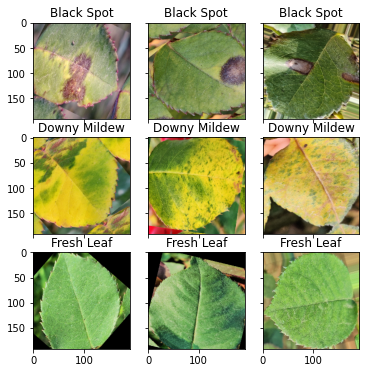

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

bim1 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (1).png')
bim2 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (200).png')
bim3 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Black Spot/Black Spot (500).png')
dim1 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Downy mildew/Downy Mildew (1).png')
dim2 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Downy mildew/Downy Mildew (100).png')
dim3 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Downy mildew/Downy Mildew (500).png')
fim1 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Fresh Leaf/Fresh leaf(1).png')
fim2 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Fresh Leaf/Fresh leaf(10).png')
fim3 =preprocessor('/content/gdrive/MyDrive/Augmented dataset/Fresh Leaf/Fresh leaf(1000).png')

fig = plt.figure(figsize=(6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )
#Add labels
labels = ['Black Spot', 'Black Spot', 'Black Spot', "Downy Mildew", "Downy Mildew", "Downy Mildew", "Fresh Leaf", "Fresh Leaf", "Fresh Leaf"]
label = 0
for axes in grid:
    axes.set_title(labels[label], fontdict=None, loc='center', color = "k")
    label +=1

for ax, im in zip(grid, [bim1, bim2, bim3, dim1, dim2, dim3, fim1, fim2, fim3]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

The differences between the healthy leaves and unhealthy leaves can be compared visually (shown above). The fresh leaves have nothing on the leaves but green, the downly mildew leaves are mostly covered in yellow (mildew), and the black spot leaf shows only a few but very large black spots on the green leaves.

*Train Test Split*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 1987)

**Model 1: Multilayer Perceptron Network (ANN)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

with tf.device('/device:GPU:0'): 
  ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', input_shape = (192, 192, 3)), #Input Layer
    tf.keras.layers.Dense(100, activation='relu'), #Hidden Layer
    tf.keras.layers.Dense(3, activation='softmax') #Output Layer
  ])

ann.compile(
  optimizer="adam",
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

# Fitting the CNN to the Training set
ann.fit(X_train, y_train, epochs = 10, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
109/109 [==============================] - 7s 63ms/step - loss: 2.6327 - accuracy: 0.6098 - val_loss: 0.9506 - val_accuracy: 0.6651
Epoch 2/10
109/109 [==============================] - 7s 61ms/step - loss: 0.8131 - accuracy: 0.6985 - val_loss: 0.5760 - val_accuracy: 0.7606
Epoch 3/10
109/109 [==============================] - 7s 61ms/step - loss: 0.7378 - accuracy: 0.7149 - val_loss: 0.7640 - val_accuracy: 0.6686
Epoch 4/10
109/109 [==============================] - 7s 61ms/step - loss: 0.7106 - accuracy: 0.7000 - val_loss: 0.5543 - val_accuracy: 0.7319
Epoch 5/10
109/109 [==============================] - 7s 61ms/step - loss: 0.6413 - accuracy: 0.7034 - val_loss: 1.0089 - val_accuracy: 0.6479
Epoch 6/10
109/109 [==============================] - 7s 63ms/step - loss: 0.5395 - accuracy: 0.7426 - val_loss: 0.7402 - val_accuracy: 0.6824
Epoch 7/10
109/109 [==============================] - 7s 62ms/step - loss: 0.5563 - accuracy: 0.7348 - val_loss: 0.5731 - val_accuracy: 0.7388

In [ ]:
#Evaluate ANN on test data
annscores = ann.evaluate(X_test, y_test)
print("Loss and accuracy score for MLP model:", annscores)

28/28 [==============================] - 0s 16ms/step - loss: 0.6143 - accuracy: 0.7158
Loss and accuracy score for MLP model: [0.6142574548721313, 0.7157652378082275]


The predictive accuracy score for the ANN with 100 hidden units in the hidden layer is 71.58%.

**Model 2: CNN 1 (Hypertuning epochs)**

*CNN 1.1: Finding optimal number of epochs*

In [ ]:
with tf.device('/device:GPU:0'): 

  cnn = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=10, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  cnn.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
  cnn.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
109/109 [==============================] - 78s 710ms/step - loss: 0.6598 - accuracy: 0.6576 - val_loss: 0.4678 - val_accuracy: 0.7526
Epoch 2/25
109/109 [==============================] - 78s 712ms/step - loss: 0.4920 - accuracy: 0.7483 - val_loss: 0.5409 - val_accuracy: 0.7756
Epoch 3/25
109/109 [==============================] - 77s 711ms/step - loss: 0.4528 - accuracy: 0.7786 - val_loss: 0.5500 - val_accuracy: 0.7215
Epoch 4/25
109/109 [==============================] - 78s 716ms/step - loss: 0.4413 - accuracy: 0.7861 - val_loss: 0.4324 - val_accuracy: 0.7917
Epoch 5/25
109/109 [==============================] - 80s 730ms/step - loss: 0.4170 - accuracy: 0.8022 - val_loss: 0.3870 - val_accuracy: 0.8170
Epoch 6/25
109/109 [==============================] - 77s 710ms/step - loss: 0.3952 - accuracy: 0.8258 - val_loss: 0.4466 - val_accuracy: 0.7894
Epoch 7/25
109/109 [==============================] - 78s 713ms/step - loss: 0.3511 - accuracy: 0.8396 - val_loss: 0.3592 - val_ac

CNN 1.2: Final CNN Model

In [ ]:
with tf.device('/device:GPU:0'): 

  cnn_tuned = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=100, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  cnn_tuned.compile(
    optimizer="adam",
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the cnn_tuned to the Training set
  cnn_tuned.fit(X_train, y_train, epochs = 17, verbose=1,validation_data=(X_test,y_test))

Epoch 1/17
109/109 [==============================] - 362s 3s/step - loss: 0.6444 - accuracy: 0.6424 - val_loss: 0.5498 - val_accuracy: 0.6329
Epoch 2/17
109/109 [==============================] - 359s 3s/step - loss: 0.5070 - accuracy: 0.7311 - val_loss: 0.4330 - val_accuracy: 0.7952
Epoch 3/17
109/109 [==============================] - 363s 3s/step - loss: 0.4666 - accuracy: 0.7737 - val_loss: 0.4199 - val_accuracy: 0.7917
Epoch 4/17
109/109 [==============================] - 362s 3s/step - loss: 0.4098 - accuracy: 0.8065 - val_loss: 0.3903 - val_accuracy: 0.8101
Epoch 5/17
109/109 [==============================] - 360s 3s/step - loss: 0.4059 - accuracy: 0.8123 - val_loss: 0.3753 - val_accuracy: 0.8285
Epoch 6/17
109/109 [==============================] - 360s 3s/step - loss: 0.3730 - accuracy: 0.8267 - val_loss: 0.4007 - val_accuracy: 0.8216
Epoch 7/17
109/109 [==============================] - 360s 3s/step - loss: 0.3483 - accuracy: 0.8497 - val_loss: 0.3684 - val_accuracy: 0.8354

In [ ]:
#Evaluate cnn_tuned on test data
cnn_tunedscores = cnn_tuned.evaluate(X_test, y_test)
print("Loss and accuracy score for CNN model w/optimal number of epochs:", cnn_tunedscores)

28/28 [==============================] - 23s 802ms/step - loss: 0.7836 - accuracy: 0.8458
Loss and accuracy score for CNN model w/optimal number of epochs: [0.7836360335350037, 0.8457997441291809]


This model with the optimal number of epochs (17) had a predictive accuracy of about 84.5%. While this is not bad, the other transfer learning models had a better performance.

**Model 3: CNN 1 (Hypertuning Filters)**

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner as kt
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.python.keras.layers.convolutional import Convolution2D

In [ ]:
#X_train=X_train.reshape(len(X_train),192,192,3)
#X_test=X_test.reshape(len(X_test),192, 192,3)
def create_model(hyperparam):
  model = keras.models.Sequential()
  model.add(Convolution2D(filters=hyperparam.Int('filters1',min_value=32, max_value=128, step=16), kernel_size=hyperparam.Choice('filtersize1', values = [3,6]), padding = 'same', activation='relu',input_shape=(192,192,3))),
  model.add(Convolution2D(filters=hyperparam.Int('filters2', min_value=64, max_value=128, step=16),kernel_size=hyperparam.Choice('filtersize2', values = [3,6]), padding = 'same',activation='relu')),
  model.add(Convolution2D(filters=hyperparam.Int('filters3', min_value=64, max_value=128, step=16),kernel_size=hyperparam.Choice('filtersize3', values = [3,6]), padding = 'same',activation='relu')),
  model.add(Flatten()),
  model.add(Dense(3)),
  model.add(Activation("softmax"))
  model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


In [ ]:
tuner_search = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial = 1,
    directory = 15)

In [ ]:
tuner_search.search(X_train, y_train, epochs=1, validation_data=(X_test, y_test))
best_model = tuner_search.get_best_models()[0]

Trial 1 Complete [00h 55m 36s]
val_accuracy: 0.6225546598434448

Best val_accuracy So Far: 0.6225546598434448
Total elapsed time: 00h 55m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#Evaluate CNN on test data
best_model_scores = best_model.evaluate(X_test, y_test)
print("Loss and accuracy score for hypertuned CNN model:", best_model_scores)

28/28 [==============================] - 209s 7s/step - loss: 0.9145 - accuracy: 0.6226
Loss and accuracy score for hypertuned CNN model: [0.914505124092102, 0.6225546598434448]


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 192, 192, 96)     10464     
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 192, 192, 96)     83040     
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 192, 192, 112)    387184    
 pper)                                                           
                                                                 
 flatten (Flatten)           (None, 4128768)           0         
                                                                 
 dense (Dense)               (None, 3)                 12386307  
                                                        

Based on the model summary, the optimal number of filters in the first layer and second layer was 96 for both, followed by 112 for the third. After hypertuning, the model still performed the worst out of all 6 models with an accuracy score of 62.25%. This is not unexpected, considering the model is not exceptionally deep, and there are no pooling layers, padding, strides, etc. which gives plenty of room for overfitting.

**Model 4: VGG 16 - Transfer Learning Approach 1**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Input
from tensorflow.keras.models import Model

In [ ]:
#Create training/validation iterators
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(192,192,3))

# flatten the output of the convolutional part: 
x = Flatten()(vgg.output)
# three hidden layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
# final softmax layer with 3 categories
predictions = Dense(3, activation='softmax')(x)

# creating the final model:
final = Model(inputs=vgg.input, outputs=predictions)
final.summary() #Getting summary of final model

#Lock layers
for layer in vgg.layers:
    layer.trainable = False
#Compile
final.compile(
  optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

#Train Data
final.fit(X_train, y_train, epochs = 8)
#Test Data
evaluate = final.evaluate(X_test, y_test)
print("Loss and accuracy score for VGG16 model:", evaluate)

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                              

The accuracy score of the VGG16 is 95.28%, which is a pretty high score. This can be attributed to the fact that the VGG models have practiced with ImageNet images and that the epochs number increased. 

**Model 5: VGG 19 - Transfer Learning Approach 2**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

#Create training/validation iterators
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(192,192,3))

# flatten the output of the convolutional part: 
x = Flatten()(vgg19.output)
# three hidden layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
# final softmax layer with 3 categories
predictions = Dense(3, activation='softmax')(x)

# creating the final model:
final = Model(inputs=vgg19.input, outputs=predictions)
final.summary() #Getting summary of final model

#Lock layers
for layer in vgg19.layers:
    layer.trainable = False
#Compile
final.compile(
  optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

#Train Data
final.fit(X_train, y_train, epochs = 8)
#Test Data
final.evaluate(X_test, y_test)
#Test Data
evaluate = final.evaluate(X_test, y_test)
print("Loss and accuracy score for VGG19 model:", evaluate)

80150528/80134624 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                            

The accuracy score of the VGG 19 is 85%, which is surprisingly lower than the VGG1 (possibly due to the fact that the VGG19 had more parameters) but better than the previous models run.

**Model 6: Xception - Transfer Learning Approach 3**

In [ ]:
#from tensorflow.keras.applications.xception.Xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception

In [ ]:
#Create training/validation iterators
Xception = Xception(weights='imagenet', include_top=False, input_shape = (192,192,3))

# flatten the output of the convolutional part: 
x = Flatten()(Xception.output)
# final softmax layer with 3 categories
predictions = Dense(3, activation='softmax')(x)

# creating the final model:
final = Model(inputs=Xception.input, outputs=predictions)
final.summary() #Getting summary of final model

#Lock layers
for layer in Xception.layers:
    layer.trainable = False
#Compile
final.compile(
  optimizer="adam", # to use callback set lr arg such as Adam(lr=0.001) instead
  loss= 'categorical_crossentropy',
  metrics=['accuracy'])

#Train Data
final.fit(X_train, y_train, epochs = 8)
#Test Data
evaluate = final.evaluate(X_test, y_test)
print("Loss and accuracy score for Xception model:", evaluate)

83697664/83683744 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 95, 95, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 95, 95, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                           

The Xception model was the best in terms of accuracy, even compared to the VGG models (95.62%). Perhaps it was due to the fact that the epochs was greater than 1, they had fewer parameters than the VGG models, and the depthwise separable convolutional layers used. 

**Best Model**


> The Xception outperformed all other models, as their accuracy score when evaluating on the test set was 0.9563. This may be attributed to the fact that this model has practiced on over millions of images in the ImageNet database, and is known for being one of the best transfer learning models in image classification, even better than the VGG series.

> The high predictive score of the model can also be due to  the fact that the Xception does not use standard convolutional layers,but a modified version of the depthwise separale convolution from Inception v3. The standard convolutional layer apply filters across all input channels and combine the values in one step. The depth-wise separable convolution from Inception v3, on the other hand, separates these steps into two kernels and thus 2 convolutions. The depthwise convolution applies convolution to 1 input channel at a time rather than all channels. The second convolution, pointwise, then  gives the linear combination for each layer. The Xception model, which is known to have better performance than the Inception v3, switches the convolutions so that pointwise goes first and depthwise is second. The depthwise separable convolutional layer is better because it reduces the number of parameters while maintaining efficiency.

> This model fullfills the purpose my main objective: To identify which roses have a disease, and if there is a disease, then what kind of diseases does that rose have. Based on the model performance, we can say with confidence that this model can predict if an image depicting a rose shows a rose with black spots, mildew, or a healthy one by 95.6%, which is a high score. By being able to well identify the different types of roses, this model can be a useful tool for early detection and early treatment of roses, as detection of such diseases earlier can save time and money for plant farmers.

> The second best model that was very close behind the Xception model was VGG16, which had an accuracy test score of 95.28, followed by the VGG19 model, then the CNN with 17 epochs, then the MLP model and finally the CNN using kerastuner. 





**References**

*Sara, Umme & Rajbongshi, Aditya & Shakil, Rashiduzzaman & Akter, Bonna & Sazzad, Sadia & Uddin, Mohammad. (2022). An extensive sunflower dataset representation for successful identification and classification of sunflower diseases. Data in Brief. 42. 108043. 10.1016/j.dib.2022.108043.*